In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
data = pd.read_csv("C:/Users/ACER/Downloads/Saikat_project/Financial Sentiment Analysis/all-data.csv", encoding='ISO-8859-1')

In [100]:
data.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [101]:
data = data.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'message'},inplace = False)

In [102]:
data.head()

,sentiment,message
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [103]:
data["message"] = data["message"].str.lower()

In [104]:
data.head()

,sentiment,message
0,neutral,technopolis plans to develop in stages an area...
1,negative,the international electronic industry company ...
2,positive,with the new production plant the company woul...
3,positive,according to the company 's updated strategy f...
4,positive,financing of aspocomp 's growth aspocomp is ag...


In [105]:
data.isnull().sum()

sentiment    0
message      0
dtype: int64

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


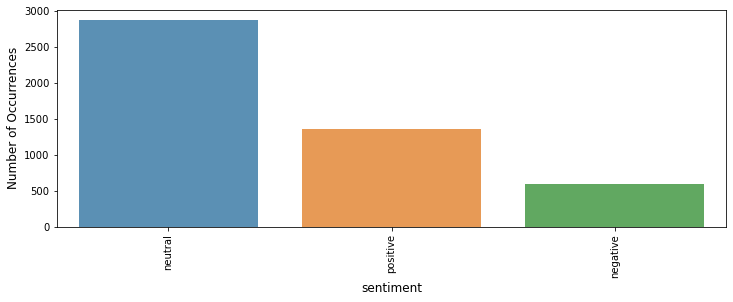

In [106]:
cnt_pro = data['sentiment'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('sentiment', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [107]:
label= pd.get_dummies(data['sentiment']).values

In [108]:
label

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [109]:
data.head()

,sentiment,message
0,neutral,technopolis plans to develop in stages an area...
1,negative,the international electronic industry company ...
2,positive,with the new production plant the company woul...
3,positive,according to the company 's updated strategy f...
4,positive,financing of aspocomp 's growth aspocomp is ag...


In [110]:
import re
import nltk

In [111]:
from nltk.corpus import stopwords

In [112]:
stop = stopwords.words('english') #preprocessing steps
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower().strip()
    text = ' '.join([i if i not in stop and i.isalpha() else '' for i in text.lower().split()])
    text = ' '.join([lemmatizer.lemmatize(w) for w in word_tokenize(text)])
    text = re.sub(r"\s{2,}", " ", text)
    return text

In [113]:
data['cleaned_message'] = data['message'].apply(clean_text)

In [114]:
data.head()

,sentiment,message,cleaned_message
0,neutral,technopolis plans to develop in stages an area...,technopolis plan develop stage area le square ...
1,negative,the international electronic industry company ...,international electronic industry company elco...
2,positive,with the new production plant the company woul...,new production plant company would increase ca...
3,positive,according to the company 's updated strategy f...,according company updated strategy year baswar...
4,positive,financing of aspocomp 's growth aspocomp is ag...,financing aspocomp growth aspocomp aggressivel...


In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_message'],label, test_size=0.15, random_state=42)

In [117]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, random_state=42)

In [119]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(3294,)
(3294, 3)
(824,)
(824, 3)
(727,)
(727, 3)


In [120]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [121]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = data['cleaned_message'].map(len).max()
EMBEDDING_DIM = 50
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True)
tokenizer.fit_on_texts(X_train.values)
word_index_whole = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index_whole))
print('Max len:', MAX_SEQUENCE_LENGTH)

Found 6932 unique tokens.
Max len: 256


In [122]:
size_of_vocabulary=len(word_index_whole) + 1 #+1 for padding
print(size_of_vocabulary)

6933


In [123]:
X_message_train = tokenizer.texts_to_sequences(X_train.values)
X_message_train = pad_sequences(X_message_train, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of train tensor:', X_message_train.shape)

Shape of train tensor: (3294, 256)


In [124]:
X_message_val = tokenizer.texts_to_sequences(X_val.values)
X_message_val = pad_sequences(X_message_val, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of Validation tensor:', X_message_val.shape)

Shape of Validation tensor: (824, 256)


In [125]:
X_message_test = tokenizer.texts_to_sequences(X_test.values)
X_message_test = pad_sequences(X_message_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of Validation tensor:', X_message_test.shape)

Shape of Validation tensor: (727, 256)


In [126]:
print(X_message_train.shape)
print(y_train.shape)
print(X_message_val.shape)
print(y_val.shape)
print(X_message_test.shape)
print(y_test.shape)

(3294, 256)
(3294, 3)
(824, 256)
(824, 3)
(727, 256)
(727, 3)


In [127]:
X_message_train

array([[   0,    0,    0, ...,   48,  413, 2262],
       [   0,    0,    0, ...,  565, 3256, 1770],
       [   0,    0,    0, ...,    3,   93,   22],
       ...,
       [   0,    0,    0, ...,  190,  190, 6927],
       [   0,    0,    0, ..., 6931,  472, 6932],
       [   0,    0,    0, ...,   21,    7,   23]])

In [128]:
from keras.models import Sequential
from keras.layers import Dense, GRU, Flatten, LSTM , SpatialDropout1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [133]:
lstm_out = 196
model = Sequential()
model.add(Embedding(size_of_vocabulary, EMBEDDING_DIM, input_length=X_message_train.shape[1]))
model.add(SpatialDropout1D(0.5))
model.add(GRU(200))
#model.add(Dense(100,activation='softmax'))
model.add(Dense(50,activation='softmax'))
#model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 256, 50)           346650    
_________________________________________________________________
spatial_dropout1d_8 (Spatial (None, 256, 50)           0         
_________________________________________________________________
gru_12 (GRU)                 (None, 200)               151200    
_________________________________________________________________
dense_14 (Dense)             (None, 50)                10050     
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 153       
Total params: 508,053
Trainable params: 508,053
Non-trainable params: 0
_________________________________________________________________
None


In [134]:
batch_size = 100
model.fit(X_message_train, y_train,validation_data=(X_message_val,y_val), epochs = 7, batch_size=batch_size)

Epoch 1/7
33/33 [==============================] - 20s 538ms/step - loss: 1.0877 - accuracy: 0.2689 - val_loss: 0.9736 - val_accuracy: 0.6032
Epoch 2/7
33/33 [==============================] - 18s 530ms/step - loss: 0.9786 - accuracy: 0.5881 - val_loss: 0.9583 - val_accuracy: 0.6032
Epoch 3/7
33/33 [==============================] - 17s 526ms/step - loss: 0.9627 - accuracy: 0.5925 - val_loss: 0.9478 - val_accuracy: 0.6032
Epoch 4/7
33/33 [==============================] - 20s 595ms/step - loss: 0.9603 - accuracy: 0.5853 - val_loss: 0.9402 - val_accuracy: 0.6032
Epoch 5/7
33/33 [==============================] - 18s 533ms/step - loss: 0.9449 - accuracy: 0.5939 - val_loss: 0.9344 - val_accuracy: 0.6032
Epoch 6/7
33/33 [==============================] - 17s 530ms/step - loss: 0.9419 - accuracy: 0.5920 - val_loss: 0.9301 - val_accuracy: 0.6032
Epoch 7/7
33/33 [==============================] - 18s 546ms/step - loss: 0.9471 - accuracy: 0.5789 - val_loss: 0.9270 - val_accuracy: 0.6032


In [135]:
predict=model.predict(X_message_test,verbose=1)

23/23 [==============================] - 2s 55ms/step


In [136]:
predict

array([[0.16943085, 0.56062454, 0.26994464],
       [0.16943084, 0.56062454, 0.26994464],
       [0.16943066, 0.5606247 , 0.2699446 ],
       ...,
       [0.16943075, 0.56062466, 0.2699446 ],
       [0.16943099, 0.56062436, 0.26994467],
       [0.16943075, 0.56062466, 0.2699446 ]], dtype=float32)

In [137]:
pred_labels = np.where(predict > 0.5, 1,0)
pred_labels

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [138]:
b=[]
for i in pred_labels:
    b.append(str(np.argmax(i)))
label=pd.DataFrame(b)

array(['1'], dtype=object)